In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
from rich import print

# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/pc4.csv")

# Check if the dataset contains null values
if df.isnull().values.any():
    print("[bold]Your dataset contains null values. The system will fill the null values with the [bold]mean[/bold] of the data.[/bold]")

    # Fill the null values with the mean
    df.fillna(df.mean(), inplace=True)
else:
    print("[bold]Your dataset does not contain any [bold]null values[/bold].[/bold]")

# Print the updated dataset
print(df.head())

# Separating the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Check if the dataset contains any categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    # One-hot encode the categorical variables
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform(X[categorical_columns])
    encoded_df = pd.DataFrame(encoded_data.toarray(), index=X.index)

    # Retrieve the encoded feature names
    encoded_columns = []
    for i, column in enumerate(categorical_columns):
        categories = encoder.categories_[i]
        encoded_columns.extend([f'{column}_{category}' for category in categories])

    encoded_df.columns = encoded_columns

    # Dropping the original categorical columns from the DataFrame
    X = X.drop(categorical_columns, axis=1)

    # Concatenate the encoded DataFrame with the \original DataFrame
    X = pd.concat([X, encoded_df], axis=1)

    print("[bold]Categorical data has been converted to numerical using one-hot encoding[/bold].")
else:
    print("[bold]Your dataset does not contain any categorical data[/bold].")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Your dataset does not contain any null values.

LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0       17.0          11.0         5.0                   2.0           8.0   
1        2.0           9.0         3.0                   0.0           1.0   
2        2.0           5.0         1.0                   1.0           1.0   
3        4.0           5.0         1.0                   0.0           0.0   
4        7.0           5.0         1.0                   3.0           0.0   

   CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  DECISION_COUNT  \
0             20.0                    6.0                0.25            10.0   
1             16.0                    5.0                0.56             6.0   
2              6.0                    3.0                0.17             2.0   
3              8.0                    3.0                0.30             4.0   
4              0.0                    3.0                0.15             0.0   

   DECISION_DENSITY  ...  NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0               2.0  ...        25.0                             0.11   
1               2.0  ...        14.0                             0.36   
2               3.0  ...         7.0                             0.13   
3               2.0  ...        10.0                             0.19   
4               0.0  ...        10.0                             0.11   

   NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
0          53.0           49.0                 23.0                  12.0   
1          13.0           24.0                  7.0                  14.0   
2          16.0           28.0                  9.0                  14.0   
3          13.0           16.0                 10.0                   9.0   
4          26.0           46.0                  7.0                   7.0   

   NUMBER_OF_LINES  PERCENT_COMMENTS  LOC_TOTAL         c  
0             57.0             31.25       24.0  b'FALSE'  
1             14.0             10.00        9.0  b'FALSE'  
2             23.0             10.53       18.0  b'FALSE'  
3             16.0              0.00       10.0  b'FALSE'  
4             28.0             15.00       20.0  b'FALSE'  

[5 rows x 38 columns]

Your dataset does not contain any categorical data.

In [5]:
#Normalization by Standard Scaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)


In [6]:
print("For dimentionality reduction the PCA technique is used. ")
pca = PCA(n_components=18, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


For dimentionality reduction the PCA technique is used.

This graph explained variance ratio of each principal component to the variable importance. The explained variance 
ratio indicates the proportion of the dataset's variance explained by each principal component.

Feature: 0, Score: 0.40948

Feature: 1, Score: 0.12059

Feature: 2, Score: 0.09228

Feature: 3, Score: 0.06861

Feature: 4, Score: 0.04821

Feature: 5, Score: 0.04228

Feature: 6, Score: 0.03474

Feature: 7, Score: 0.02580

Feature: 8, Score: 0.02529

Feature: 9, Score: 0.01831

Feature: 10, Score: 0.01732

Feature: 11, Score: 0.01473

Feature: 12, Score: 0.01368

Feature: 13, Score: 0.01212

Feature: 14, Score: 0.01099

Feature: 15, Score: 0.00949

Feature: 16, Score: 0.00672

Feature: 17, Score: 0.00535

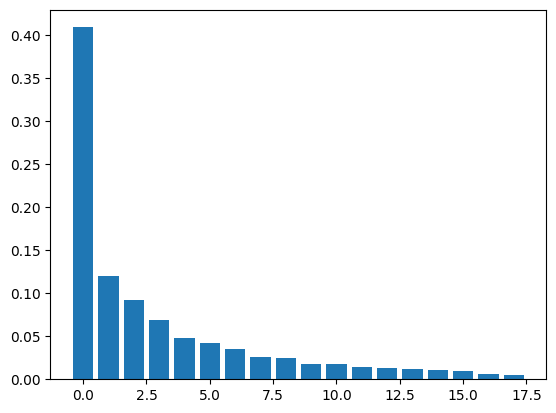

In [7]:
print("This graph explained variance ratio of each principal component to the variable importance. The explained variance ratio indicates the proportion of the dataset's variance explained by each principal component.")
importance=pca.explained_variance_ratio_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [8]:
# fit the model
model_lr = LogisticRegression(solver='liblinear')
model_rf = RandomForestClassifier(n_estimators=40, random_state=42)
model_knn= KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_lsvm=LinearSVC()



In [9]:
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_lsvm.fit(X_train, y_train)


LinearSVC()

In [10]:
yhat1 = model_lr.predict(X_test)
yhat2= model_rf.predict(X_test)
yhat3 = model_knn.predict(X_test)
yhat4 = model_dt.predict(X_test)
yhat5 = model_lsvm.predict(X_test)


In [11]:
# Now calculate metrics
print('  [bold]  Algorithms:           Accuracy,    F1_Score,    Precision,    Recall[/bold]')
print()

# Logistic Regression
accuracy1 = accuracy_score(y_test, yhat1)
f1_lr = f1_score(y_test, yhat1, pos_label="b'TRUE'")
precision_lr = precision_score(y_test, yhat1, pos_label="b'TRUE'")
recall_lr = recall_score(y_test, yhat1, pos_label="b'TRUE'")
print('Logistic Regression:       %.2f,       %.2f,        %.2f,      %.2f' % (accuracy1*100, f1_lr*100, precision_lr*100, recall_lr*100))

# Random Forest
accuracy2 = accuracy_score(y_test, yhat2)
f1_rf = f1_score(y_test, yhat2, pos_label="b'TRUE'")
precision_rf = precision_score(y_test, yhat2, pos_label="b'TRUE'")
recall_rf = recall_score(y_test, yhat2, pos_label="b'TRUE'")
print('Random Forest:             %.2f,       %.2f,        %.2f,      %.2f' % (accuracy2*100, f1_rf*100, precision_rf*100, recall_rf*100))

# KNN
accuracy3 = accuracy_score(y_test, yhat3)
f1_knn = f1_score(y_test, yhat3, pos_label="b'TRUE'")
precision_knn = precision_score(y_test, yhat3, pos_label="b'TRUE'")
recall_knn = recall_score(y_test, yhat3, pos_label="b'TRUE'")
print('KNN:                       %.2f,       %.2f,        %.2f,      %.2f' % (accuracy3*100, f1_knn*100, precision_knn*100, recall_knn*100))

# Decision Tree
accuracy4 = accuracy_score(y_test, yhat4)
f1_dt = f1_score(y_test, yhat4, pos_label="b'TRUE'")
precision_dt = precision_score(y_test, yhat4, pos_label="b'TRUE'")
recall_dt = recall_score(y_test, yhat4, pos_label="b'TRUE'")
print('Decision Tree:             %.2f,       %.2f,        %.2f,      %.2f' % (accuracy4*100, f1_dt*100, precision_dt*100, recall_dt*100))

# Linear SVM
accuracy5 = accuracy_score(y_test, yhat5)
f1_lsvm = f1_score(y_test, yhat5, pos_label="b'TRUE'")
precision_lsvm = precision_score(y_test, yhat5, pos_label="b'TRUE'")
recall_lsvm = recall_score(y_test, yhat5, pos_label="b'TRUE'")
print('Linear SVM:                %.2f,       %.2f,        %.2f,      %.2f' % (accuracy5*100, f1_lsvm*100, precision_lsvm*100, recall_lsvm*100))

  Algorithms:           Accuracy,    F1_Score,    Precision,    Recall

Logistic Regression:       92.47,       56.00,        73.68,      45.16

Random Forest:             92.12,       54.90,        70.00,      45.16

KNN:                       89.04,       40.74,        47.83,      35.48

Decision Tree:             87.67,       43.75,        42.42,      45.16

Linear SVM:                91.78,       47.83,        73.33,      35.48

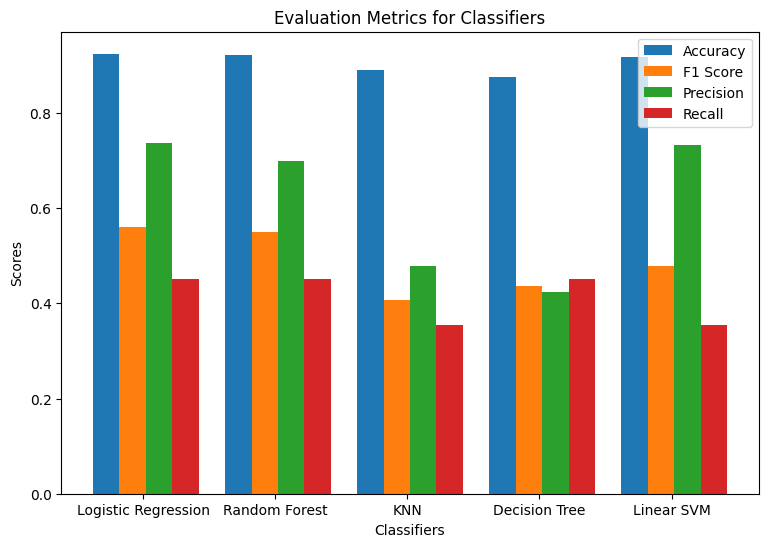

In [12]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_values = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]

# F1 score values
f1_score_values = [f1_lr, f1_rf, f1_knn, f1_dt, f1_lsvm]

# Precision values
precision_values = [precision_lr, precision_rf, precision_knn, precision_dt, precision_lsvm]

# Recall values
recall_values = [recall_lr, recall_rf, recall_knn, recall_dt, recall_lsvm]

classifiers = ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'Linear SVM']

# Plotting the bar plot
x = range(len(classifiers))
width = 0.2

# Increase the figure size here
fig, ax = plt.subplots(figsize=(9, 6))  # Adjust width and height as needed
rects1 = ax.bar(x, accuracy_values, width, label='Accuracy')
rects2 = ax.bar([i + width for i in x], f1_score_values, width, label='F1 Score')
rects3 = ax.bar([i + (width*2) for i in x], precision_values, width, label='Precision')
rects4 = ax.bar([i + (width*3) for i in x], recall_values, width, label='Recall')

# Adding labels, title, and legend
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Classifiers')
ax.set_xticks([i + width*1.4 for i in x])
ax.set_xticklabels(classifiers)
ax.legend()

# Displaying the plot
plt.show()